<a href="https://colab.research.google.com/github/lisosoma/BI_ML/blob/main/HW5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM и его ядра
__Суммарное количество баллов: 10__

# Задание 1 (7 баллов)

В этом задании вам не нужно будет реализовать SVM, а научиться его применять.

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [ ]:
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_blobs2, y_blobs2  = make_blobs(n_samples=1000, random_state=4, center_box=(-2, 2),cluster_std=0.4, centers=2)
X_train, X_test, y_train, y_test = train_test_split(X_blobs2, y_blobs2, test_size=0.4)

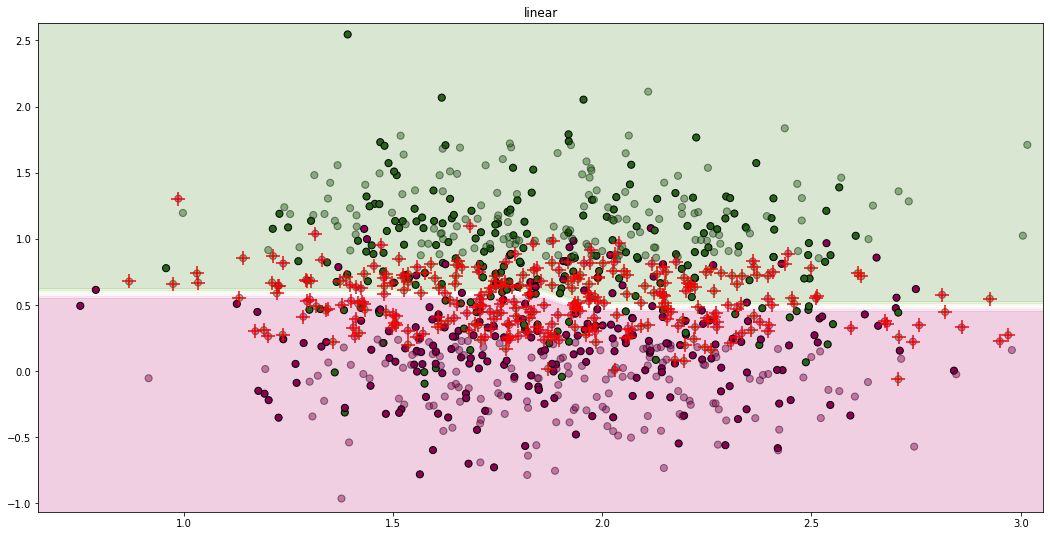

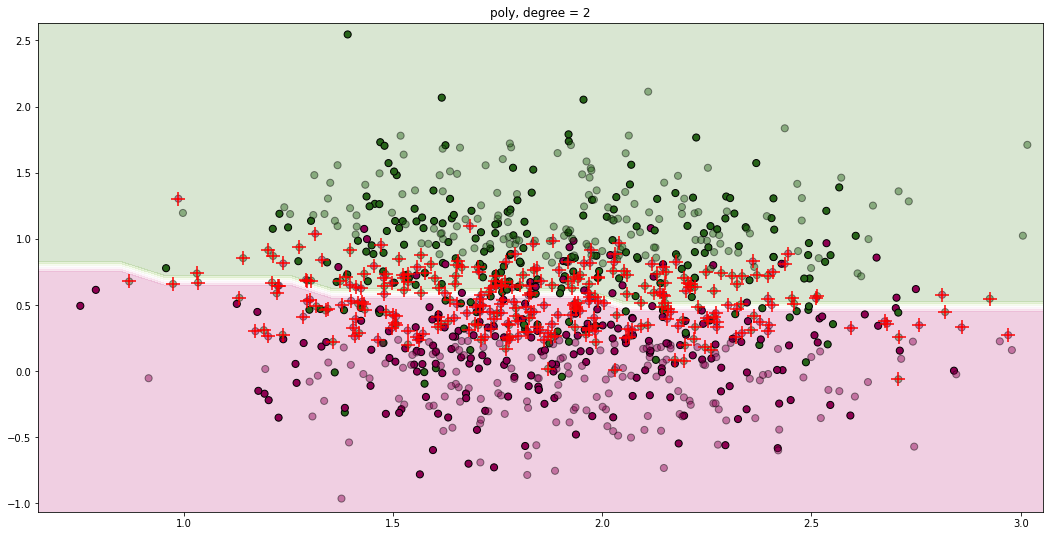

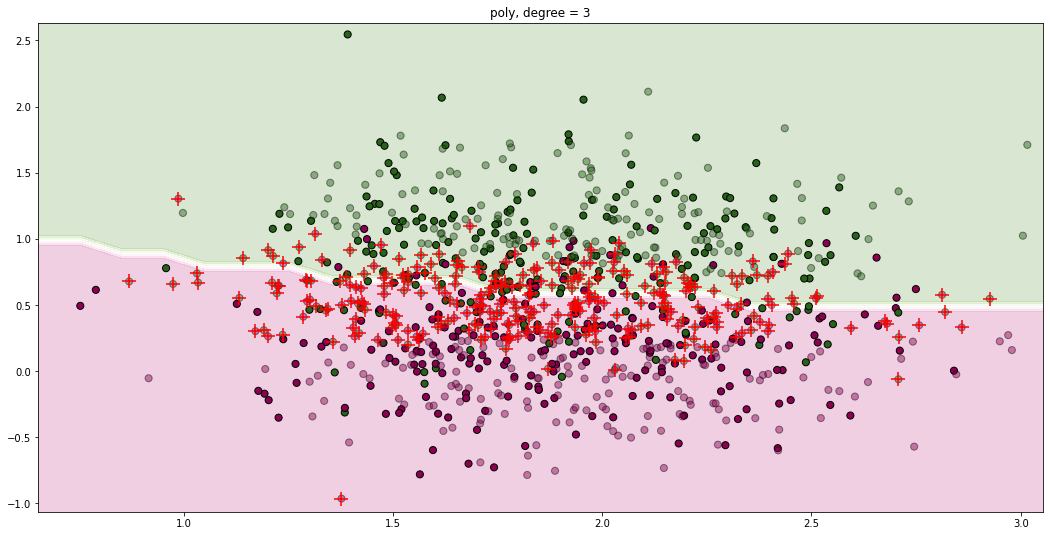

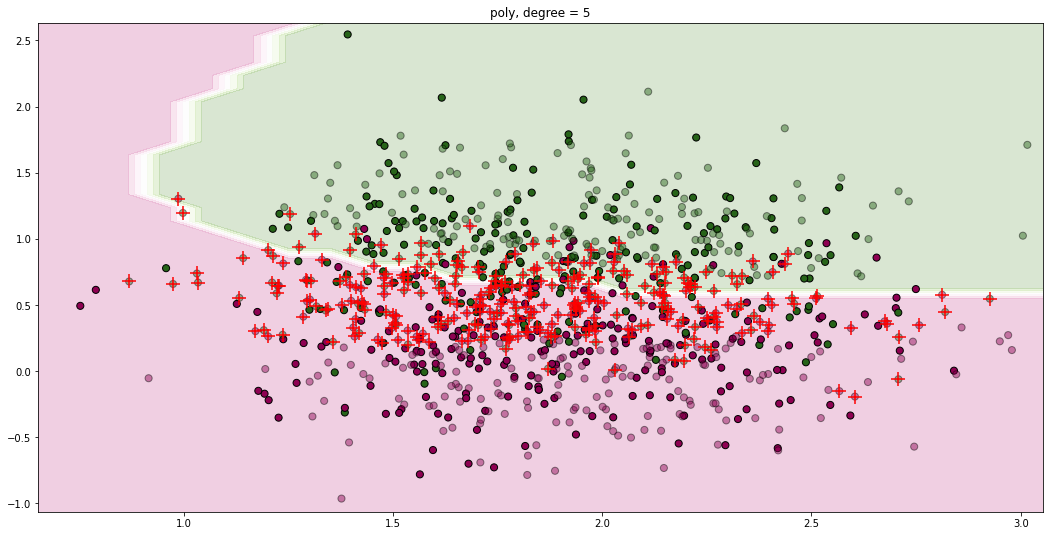

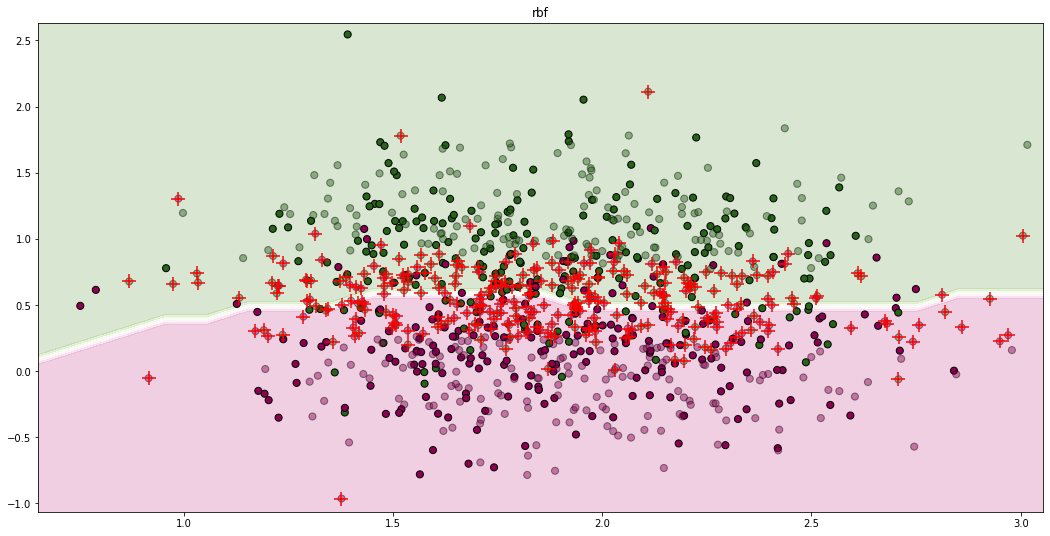

In [ ]:
def scv_plot(kernel, degree=3):
    svc_clf = SVC(kernel=kernel, degree=degree)
    svc_clf.fit(X_train, y_train)
    
    x_min, x_max = X_blobs2[:, 0].min() - 0.1, X_blobs2[:, 0].max() + 0.1
    y_min, y_max = X_blobs2[:, 1].min() - 0.1, X_blobs2[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    fig, ax = plt.subplots(figsize=(18, 9))
    zz = svc_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    
    cm = plt.cm.PiYG
    
    if kernel == 'poly':
        plt.title(f'{kernel}, degree = {degree}')
    else:
        plt.title(f'{kernel}')

    ax.contourf(xx, yy, zz, cmap=cm, alpha=0.2)
    
    # выведем тестовые данные
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm, s=50, edgecolor="k")
    
    # выведем тренировочные данные также
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm, s=50, edgecolor="k", alpha=0.45)
    
    # опорные векторы
    ax.scatter(svc_clf.support_vectors_[:, 0], svc_clf.support_vectors_[:, 1], c='r', marker='+', s=200)

    plt.show()
    
kernels = ['linear', 'poly', 'rbf']
degrees = [2, 3, 5]

for k in kernels:
    if k == 'poly':
        for d in degrees:
            scv_plot(k, d)
    else:
        scv_plot(k)

# Задание 2 (3 балла)

Протестируйте SVM на датасете spam. Для этой задачи используйте данные x_spam_train и y_spam_train:

1. Выполните загрузку и предобработку файлов x_spam_train и y_spam_train.
2. Разбейте x_spam_train и y_spam_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрики precision, recall, accuracy для модели SVM. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Сравните время работы SVM и Random Forest при близкой точности.

Ответьте на следующие вопросы:
1. Какой нужен препроцессинг данных для моделей?
2. Какая модель делает предсказания лучше? Предположите, почему.

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import time

Обучите модель на всех данных из x_spam_train и y_spam_train.
Сделайте submit своего решения и получите значение f1_score не менее 0.6

In [ ]:
df = pd.read_csv('/kaggle/input/homework-svm-ib-22/x_spam_train.csv')
X = df.drop(columns='Id')
y = pd.read_csv('/kaggle/input/homework-svm-ib-22/y_spam_train.csv')
y = y['Expected']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [ ]:
svc = SVC(kernel='linear')
t1 = time.time()
svc.fit(X_train, y_train)
print('Время работы SCV', time.time() - t1)

Время работы SCV 176.3008518218994


In [ ]:
y_pred = svc.predict(X_test)
print('Метрики для SVC')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('F1', f1_score(y_test, y_pred))

Метрики для SVC
Accuracy 0.9171195652173914
Recall 0.8849407783417935
Precision 0.9064124783362218
F1 0.8955479452054794


In [ ]:
forest = RandomForestClassifier()
t2 = time.time()
forest.fit(X_train, y_train)
print('Время работы RandomForest', time.time() - t2)

Время работы RandomForest 0.4849097728729248


In [ ]:
y_pred = forest.predict(X_test)
print('Метрики для Random forest')
print('Accuracy', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('F1', f1_score(y_test, y_pred))

Метрики для Random forest
Accuracy 0.9456521739130435
Recall 0.9137055837563451
Precision 0.9490333919156415
F1 0.9310344827586207


In [ ]:
svc.fit(X, y)
X_spam_test = pd.read_csv('/kaggle/input/homework-svm-ib-22/x_spam_test.csv')
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = X_spam_test['Id']
submission["Expected"] = svc.predict(X_spam_test.drop(columns='Id'))
submission.to_csv('submission.csv', index=False)

Препроцессинг -- удаление столбца с Id.

Лучше делает предсказания модель Random Forest. Возможно, потому что она является ансамблевой моделью.